# Modelo AutoRegressivo

Utilizando modelo autoregressivo para modelar a série temporal

Utilizaremos uma série temporal do número de passageiros de uma linha de trem

* Importando biblitecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

* Lendo arquivo CSV

In [3]:
dados = pd.read_csv('Passageiros.csv')

Exibindo cinco primeiras linhas

In [4]:
dados.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


* Removendo coluna ID

In [5]:
dados = dados.drop('ID',axis=1)

* Definindo data como índice

In [6]:
dados['Datetime'] = pd.to_datetime(dados['Datetime'])
dados = dados.set_index('Datetime')

* Número de passageiros diário

In [7]:
dados =  dados.resample('D').sum()
dados = dados.dropna()

* Graficando série temporal

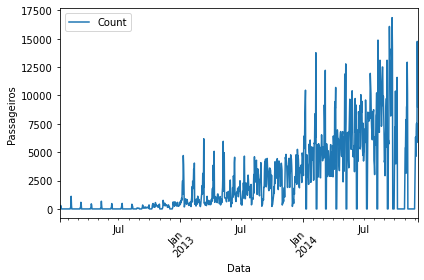

In [8]:
dados.plot()
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Passageiros')
plt.tight_layout()

In [9]:
t_treino = dados[dados.index<'2014-06-01'].index.values
t_teste = dados[dados.index>='2014-06-01'].index.values
X_treino = dados[dados.index<'2014-06-01'].values
X_teste = dados[dados.index>='2014-06-01'].values

* Aplicando modelo autoregressivo

In [10]:
from statsmodels.tsa.ar_model import AutoReg

In [11]:
modelo = AutoReg(X_treino, 1)
resultado = modelo.fit()
print(resultado.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  874
Model:                     AutoReg(1)   Log Likelihood               -7553.427
Method:               Conditional MLE   S.D. of innovations           1384.821
Date:                Fri, 18 Sep 2020   AIC                             14.474
Time:                        13:49:14   BIC                             14.490
Sample:                             1   HQIC                            14.480
                                  874                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    360.8120     58.642      6.153      0.000     245.875     475.748
y.L1           0.7904      0.021     38.056      0.000       0.750       0.831
                                    Roots           

* Coeficientes

In [12]:
print('Coefficients: %s' % resultado.params)

Coefficients: [360.81195926   0.79040236]


* AIC

In [13]:
AIC = resultado.aic

In [14]:
print("AIC = {:0.2f}".format(AIC))

AIC = 14.47


* Fazendo predições

In [15]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

* Calculando erros

(array([15340., 15461., 15584., 15706., 15826., 15949., 16071., 16191.,
        16314., 16436.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

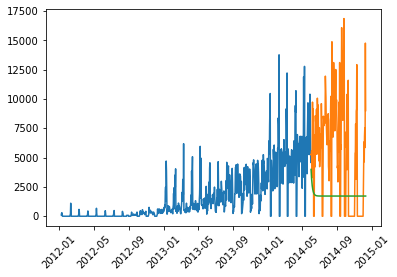

In [16]:
plt.plot(t_treino,X_treino)
plt.plot(t_teste,X_teste)
plt.plot(t_teste,X_pred)
plt.xticks(rotation=45)

* Calculando erros

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
MSE = mean_squared_error(X_teste,X_pred)

In [19]:
RMSE = np.sqrt(MSE)

In [20]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 5799.99


* Grid Search

In [21]:
for i in range(1,20):
    modelo = AutoReg(X_treino, i)
    resultado = modelo.fit()
    AIC = resultado.aic
    X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)
    MSE = mean_squared_error(X_teste,X_pred)
    RMSE = np.sqrt(MSE)
    print("i = {} AIC = {:0.2f} RMSE = {:0.2f}".format(i, AIC,RMSE))

i = 1 AIC = 14.47 RMSE = 5799.99
i = 2 AIC = 14.45 RMSE = 5768.81
i = 3 AIC = 14.43 RMSE = 5729.53
i = 4 AIC = 14.42 RMSE = 5673.24
i = 5 AIC = 14.40 RMSE = 5541.22
i = 6 AIC = 14.38 RMSE = 5372.69
i = 7 AIC = 14.35 RMSE = 5096.48
i = 8 AIC = 14.35 RMSE = 4994.44
i = 9 AIC = 14.35 RMSE = 4876.92
i = 10 AIC = 14.35 RMSE = 4801.32
i = 11 AIC = 14.35 RMSE = 4615.67
i = 12 AIC = 14.35 RMSE = 4436.64
i = 13 AIC = 14.34 RMSE = 4317.43
i = 14 AIC = 14.34 RMSE = 4301.19
i = 15 AIC = 14.34 RMSE = 4340.56
i = 16 AIC = 14.34 RMSE = 4342.61
i = 17 AIC = 14.34 RMSE = 4414.90
i = 18 AIC = 14.34 RMSE = 4467.51
i = 19 AIC = 14.33 RMSE = 4744.78


* Indíce igual a 14 apresentou melhor resultado

In [22]:
modelo = AutoReg(X_treino, 14)
resultado = modelo.fit()
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

(array([15340., 15461., 15584., 15706., 15826., 15949., 16071., 16191.,
        16314., 16436.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

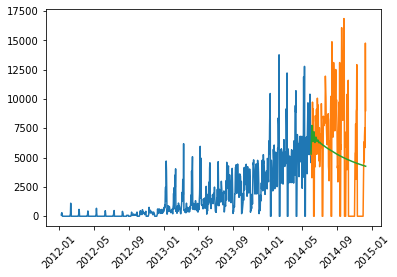

In [23]:
plt.plot(t_treino,X_treino)
plt.plot(t_teste,X_teste)
plt.plot(t_teste,X_pred)
plt.xticks(rotation=45)